In [23]:

import models
import utils
import data_processing
from constants import (
    VALUE_COLUMN,
    UNIT_RATE_COLUMN,
    QUANTITY_COLUMN,
    GROSS_WEIGHT_COLUMN,
    SHIP_COUNT_COLUMN,
    PORT_COUNT_COLUMN,
    FILL_METHOD,
    TARGET_COLUMN
)
import pandas as pd
import constants
import sys
from datetime import datetime
from build_data import get_data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

In [22]:
COMMODITY = "magnesium"
SPIKES_WINDOW_SIZE = 10
print(SPIKES_WINDOW_SIZE)

VOLZA_FILE_PATH = f"../volza/{COMMODITY}/{COMMODITY}.csv"
PRICE_FILE_PATH = f"../volza/{COMMODITY}/{COMMODITY}_prices.csv"

# Get the data
# data = get_data(VOLZA_FILE_PATH, "cobalt_prices.csv", SPIKES_WINDOW_SIZE)
data = get_data(VOLZA_FILE_PATH, PRICE_FILE_PATH, SPIKES_WINDOW_SIZE)

10
Building data...
Detecting spikes... 10


/Users/harshdeepsingh/ASU/Lab_V2/GSN/onr_price_prediction/analysis/build_data.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brent_df.rename(columns={"Value": "Brent Oil Value"}, inplace=True)
/Users/harshdeepsingh/ASU/Lab_V2/GSN/onr_price_prediction/analysis/build_data.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wti_df.rename(columns={"Value": "WTI Oil Value"}, inplace=True)


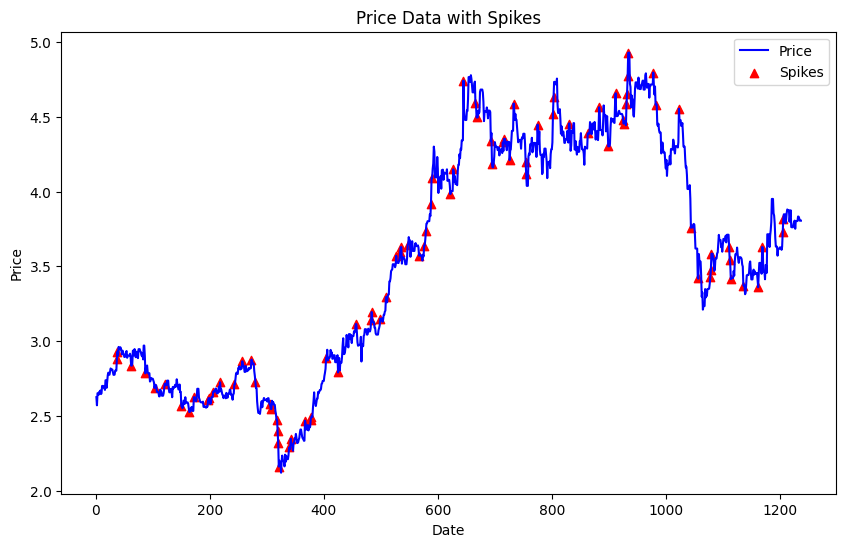

In [21]:
utils.plot_prices(data, "cobalt")

In [ ]:
prices_pd = pd.read_csv(PRICE_FILE_PATH)
prices_pd["Date"] = pd.to_datetime(prices_pd["Date"])
prices_pd["Date"] = prices_pd['Date'].dt.strftime("%b %d, %Y")



prices_pd.to_csv("cobalt_prices.csv",index=False)

In [24]:
# Trying out different window sizes
SPIKE_WINDOW_SIZES = [10, 20, 30, 40, 60, 80, 100]
results_dfs = []

for window_size in SPIKE_WINDOW_SIZES:
    SPIKES_WINDOW_SIZE = window_size
    aggregated_df = get_data(VOLZA_FILE_PATH, PRICE_FILE_PATH, SPIKES_WINDOW_SIZE)
    VOLZA_FEATURES = [VALUE_COLUMN, UNIT_RATE_COLUMN, QUANTITY_COLUMN, GROSS_WEIGHT_COLUMN]
    X, y = data_processing.prepare_features_and_target(aggregated_df, VOLZA_FEATURES, 'spikes')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    X_train, X_test = data_processing.scale_features(X_train, X_test)

    X_train, y_train = data_processing.create_sequences(X_train, y_train, SPIKES_WINDOW_SIZE)
    X_test, y_test = data_processing.create_sequences(X_test, y_test, SPIKES_WINDOW_SIZE)
    
    print(f'X train shape: {X_train.shape}')

    output_file_path = f'{COMMODITY}/volza/results_{window_size}.csv'
    pred_file_path = f'{COMMODITY}/volza/predictions/{window_size}'
    print(pred_file_path)
    results_df = models.evaluate_all(X_train, y_train, X_test, y_test, output_file_path, pred_file_path)
    results_df['Window Size'] = window_size
    results_dfs.append(results_df)
    

Building data...
Detecting spikes... 10
X train shape: (766, 10, 4)
magnesium/volza/predictions/10


/Users/harshdeepsingh/ASU/Lab_V2/GSN/onr_price_prediction/analysis/build_data.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brent_df.rename(columns={"Value": "Brent Oil Value"}, inplace=True)
/Users/harshdeepsingh/ASU/Lab_V2/GSN/onr_price_prediction/analysis/build_data.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wti_df.rename(columns={"Value": "WTI Oil Value"}, inplace=True)


6/6 [==============================] - 0s 4ms/step
Predictions saved to CSV file: magnesium/volza/predictions/10/LSTM_250_layers_predictions.csv
Predictions saved to NPY file: magnesium/volza/predictions/10/LSTM_250_layers_predictions.npy
6/6 [==============================] - 0s 3ms/step
Predictions saved to CSV file: magnesium/volza/predictions/10/LSTM_200_layers_predictions.csv
Predictions saved to NPY file: magnesium/volza/predictions/10/LSTM_200_layers_predictions.npy
6/6 [==============================] - 0s 3ms/step
Predictions saved to CSV file: magnesium/volza/predictions/10/LSTM_100_layers_predictions.csv
Predictions saved to NPY file: magnesium/volza/predictions/10/LSTM_100_layers_predictions.npy
6/6 [==============================] - 0s 1ms/step
Predictions saved to CSV file: magnesium/volza/predictions/10/LSTM_50_layers_predictions.csv
Predictions saved to NPY file: magnesium/volza/predictions/10/LSTM_50_layers_predictions.npy
6/6 [==============================] - 0s 717u

/Users/harshdeepsingh/ASU/Lab_V2/GSN/onr_price_prediction/analysis/build_data.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brent_df.rename(columns={"Value": "Brent Oil Value"}, inplace=True)
/Users/harshdeepsingh/ASU/Lab_V2/GSN/onr_price_prediction/analysis/build_data.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wti_df.rename(columns={"Value": "WTI Oil Value"}, inplace=True)


X train shape: (756, 20, 4)
magnesium/volza/predictions/20
6/6 [==============================] - 0s 7ms/step
Predictions saved to CSV file: magnesium/volza/predictions/20/LSTM_250_layers_predictions.csv
Predictions saved to NPY file: magnesium/volza/predictions/20/LSTM_250_layers_predictions.npy
6/6 [==============================] - 0s 4ms/step
Predictions saved to CSV file: magnesium/volza/predictions/20/LSTM_200_layers_predictions.csv
Predictions saved to NPY file: magnesium/volza/predictions/20/LSTM_200_layers_predictions.npy
6/6 [==============================] - 0s 7ms/step
Predictions saved to CSV file: magnesium/volza/predictions/20/LSTM_100_layers_predictions.csv
Predictions saved to NPY file: magnesium/volza/predictions/20/LSTM_100_layers_predictions.npy
6/6 [==============================] - 0s 2ms/step
Predictions saved to CSV file: magnesium/volza/predictions/20/LSTM_50_layers_predictions.csv
Predictions saved to NPY file: magnesium/volza/predictions/20/LSTM_50_layers_pre

/Users/harshdeepsingh/ASU/Lab_V2/GSN/onr_price_prediction/analysis/build_data.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brent_df.rename(columns={"Value": "Brent Oil Value"}, inplace=True)
/Users/harshdeepsingh/ASU/Lab_V2/GSN/onr_price_prediction/analysis/build_data.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wti_df.rename(columns={"Value": "WTI Oil Value"}, inplace=True)


Detecting spikes... 30
X train shape: (746, 30, 4)
magnesium/volza/predictions/30
6/6 [==============================] - 0s 15ms/step
Predictions saved to CSV file: magnesium/volza/predictions/30/LSTM_250_layers_predictions.csv
Predictions saved to NPY file: magnesium/volza/predictions/30/LSTM_250_layers_predictions.npy
6/6 [==============================] - 0s 13ms/step
Predictions saved to CSV file: magnesium/volza/predictions/30/LSTM_200_layers_predictions.csv
Predictions saved to NPY file: magnesium/volza/predictions/30/LSTM_200_layers_predictions.npy
6/6 [==============================] - 0s 6ms/step
Predictions saved to CSV file: magnesium/volza/predictions/30/LSTM_100_layers_predictions.csv
Predictions saved to NPY file: magnesium/volza/predictions/30/LSTM_100_layers_predictions.npy
6/6 [==============================] - 0s 3ms/step
Predictions saved to CSV file: magnesium/volza/predictions/30/LSTM_50_layers_predictions.csv
Predictions saved to NPY file: magnesium/volza/predicti

/Users/harshdeepsingh/ASU/Lab_V2/GSN/onr_price_prediction/analysis/build_data.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brent_df.rename(columns={"Value": "Brent Oil Value"}, inplace=True)
/Users/harshdeepsingh/ASU/Lab_V2/GSN/onr_price_prediction/analysis/build_data.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wti_df.rename(columns={"Value": "WTI Oil Value"}, inplace=True)


Detecting spikes... 40
X train shape: (736, 40, 4)
magnesium/volza/predictions/40
5/5 [==============================] - 0s 23ms/step
Predictions saved to CSV file: magnesium/volza/predictions/40/LSTM_250_layers_predictions.csv
Predictions saved to NPY file: magnesium/volza/predictions/40/LSTM_250_layers_predictions.npy
5/5 [==============================] - 1s 22ms/step
Predictions saved to CSV file: magnesium/volza/predictions/40/LSTM_200_layers_predictions.csv
Predictions saved to NPY file: magnesium/volza/predictions/40/LSTM_200_layers_predictions.npy
5/5 [==============================] - 0s 15ms/step
Predictions saved to CSV file: magnesium/volza/predictions/40/LSTM_100_layers_predictions.csv
Predictions saved to NPY file: magnesium/volza/predictions/40/LSTM_100_layers_predictions.npy
5/5 [==============================] - 0s 4ms/step
Predictions saved to CSV file: magnesium/volza/predictions/40/LSTM_50_layers_predictions.csv
Predictions saved to NPY file: magnesium/volza/predict

/Users/harshdeepsingh/ASU/Lab_V2/GSN/onr_price_prediction/analysis/build_data.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brent_df.rename(columns={"Value": "Brent Oil Value"}, inplace=True)
/Users/harshdeepsingh/ASU/Lab_V2/GSN/onr_price_prediction/analysis/build_data.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wti_df.rename(columns={"Value": "WTI Oil Value"}, inplace=True)


Detecting spikes... 60
X train shape: (716, 60, 4)
magnesium/volza/predictions/60
5/5 [==============================] - 1s 43ms/step
Predictions saved to CSV file: magnesium/volza/predictions/60/LSTM_250_layers_predictions.csv
Predictions saved to NPY file: magnesium/volza/predictions/60/LSTM_250_layers_predictions.npy
5/5 [==============================] - 1s 32ms/step
Predictions saved to CSV file: magnesium/volza/predictions/60/LSTM_200_layers_predictions.csv
Predictions saved to NPY file: magnesium/volza/predictions/60/LSTM_200_layers_predictions.npy
5/5 [==============================] - 0s 20ms/step
Predictions saved to CSV file: magnesium/volza/predictions/60/LSTM_100_layers_predictions.csv
Predictions saved to NPY file: magnesium/volza/predictions/60/LSTM_100_layers_predictions.npy
5/5 [==============================] - 1s 5ms/step
Predictions saved to CSV file: magnesium/volza/predictions/60/LSTM_50_layers_predictions.csv
Predictions saved to NPY file: magnesium/volza/predict

/Users/harshdeepsingh/ASU/Lab_V2/GSN/onr_price_prediction/analysis/build_data.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brent_df.rename(columns={"Value": "Brent Oil Value"}, inplace=True)
/Users/harshdeepsingh/ASU/Lab_V2/GSN/onr_price_prediction/analysis/build_data.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wti_df.rename(columns={"Value": "WTI Oil Value"}, inplace=True)


Detecting spikes... 80
X train shape: (696, 80, 4)
magnesium/volza/predictions/80
4/4 [==============================] - 1s 67ms/step
Predictions saved to CSV file: magnesium/volza/predictions/80/LSTM_250_layers_predictions.csv
Predictions saved to NPY file: magnesium/volza/predictions/80/LSTM_250_layers_predictions.npy
4/4 [==============================] - 1s 44ms/step
Predictions saved to CSV file: magnesium/volza/predictions/80/LSTM_200_layers_predictions.csv
Predictions saved to NPY file: magnesium/volza/predictions/80/LSTM_200_layers_predictions.npy
4/4 [==============================] - 1s 21ms/step
Predictions saved to CSV file: magnesium/volza/predictions/80/LSTM_100_layers_predictions.csv
Predictions saved to NPY file: magnesium/volza/predictions/80/LSTM_100_layers_predictions.npy
4/4 [==============================] - 2s 8ms/step
Predictions saved to CSV file: magnesium/volza/predictions/80/LSTM_50_layers_predictions.csv
Predictions saved to NPY file: magnesium/volza/predict

/Users/harshdeepsingh/ASU/Lab_V2/GSN/onr_price_prediction/analysis/build_data.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brent_df.rename(columns={"Value": "Brent Oil Value"}, inplace=True)
/Users/harshdeepsingh/ASU/Lab_V2/GSN/onr_price_prediction/analysis/build_data.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wti_df.rename(columns={"Value": "WTI Oil Value"}, inplace=True)


Detecting spikes... 100
X train shape: (676, 100, 4)
magnesium/volza/predictions/100
3/3 [==============================] - 1s 73ms/step
Predictions saved to CSV file: magnesium/volza/predictions/100/LSTM_250_layers_predictions.csv
Predictions saved to NPY file: magnesium/volza/predictions/100/LSTM_250_layers_predictions.npy
3/3 [==============================] - 1s 103ms/step
Predictions saved to CSV file: magnesium/volza/predictions/100/LSTM_200_layers_predictions.csv
Predictions saved to NPY file: magnesium/volza/predictions/100/LSTM_200_layers_predictions.npy
3/3 [==============================] - 1s 88ms/step
Predictions saved to CSV file: magnesium/volza/predictions/100/LSTM_100_layers_predictions.csv
Predictions saved to NPY file: magnesium/volza/predictions/100/LSTM_100_layers_predictions.npy
3/3 [==============================] - 1s 19ms/step
Predictions saved to CSV file: magnesium/volza/predictions/100/LSTM_50_layers_predictions.csv
Predictions saved to NPY file: magnesium/v

In [ ]:
#Volza Only Features
aggregated_df = data.copy()
VOLZA_FEATURES = [VALUE_COLUMN, UNIT_RATE_COLUMN, QUANTITY_COLUMN, GROSS_WEIGHT_COLUMN]
X, y = data_processing.prepare_features_and_target(aggregated_df, VOLZA_FEATURES, 'spikes')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_test = data_processing.scale_features(X_train, X_test)

X_train, y_train = data_processing.create_sequences(X_train, y_train, SPIKES_WINDOW_SIZE)
X_test, y_test = data_processing.create_sequences(X_test, y_test, SPIKES_WINDOW_SIZE)

output_file_path = f'{COMMODITY}_results_volza_only.csv'
models.evaluate_all(X_train, y_train, X_test, y_test, output_file_path)

In [ ]:
#Volza and AIS Features
aggregated_df = data.copy()
VOLZA_AIS_FEATURES = [VALUE_COLUMN, UNIT_RATE_COLUMN, QUANTITY_COLUMN, GROSS_WEIGHT_COLUMN,SHIP_COUNT_COLUMN, PORT_COUNT_COLUMN ]
aggregated_df[VOLZA_AIS_FEATURES] = aggregated_df[VOLZA_AIS_FEATURES].fillna(0)

X, y = data_processing.prepare_features_and_target(aggregated_df, VOLZA_AIS_FEATURES, 'spikes')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_test = data_processing.scale_features(X_train, X_test)

X_train, y_train = data_processing.create_sequences(X_train, y_train, SPIKES_WINDOW_SIZE)
X_test, y_test = data_processing.create_sequences(X_test, y_test, SPIKES_WINDOW_SIZE)

output_file_path = f'{COMMODITY}_results_volza_ais.csv'
models.evaluate_all(X_train, y_train, X_test, y_test, output_file_path)

In [ ]:
#AIS Features
aggregated_df = data.copy()
AIS_FEATURES = [SHIP_COUNT_COLUMN, PORT_COUNT_COLUMN]
# aggregated_df = aggregated_df.dropna(subset=[SHIP_COUNT_COLUMN, PORT_COUNT_COLUMN])
aggregated_df[AIS_FEATURES] = aggregated_df[AIS_FEATURES].fillna(method=FILL_METHOD)
X, y = data_processing.prepare_features_and_target(aggregated_df, AIS_FEATURES, 'spikes')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_test = data_processing.scale_features(X_train, X_test)

X_train, y_train = data_processing.create_sequences(X_train, y_train, SPIKES_WINDOW_SIZE)
X_test, y_test = data_processing.create_sequences(X_test, y_test, SPIKES_WINDOW_SIZE)

# print(y_test)
output_file_path = f'{COMMODITY}_results_ais_only.csv'
models.evaluate_all(X_train, y_train, X_test, y_test, output_file_path)

In [ ]:
#AIS and Volza with Price ARIMA
import pmdarima as pm

aggregated_df = data.copy()

columns_of_interest = ['Price', 'spikes']  # Add other columns as necessary

aggregated_df = aggregated_df.dropna(subset=columns_of_interest)
# Fit an Auto ARIMA model to the 'Price' series
model = pm.auto_arima(aggregated_df['Price'], seasonal=True, m=12, suppress_warnings=True, stepwise=True, error_action='ignore')

# Forecast the series using the model (in-sample prediction)
forecast = model.predict_in_sample()

# Calculate residuals (difference between actual and forecasted values)
residuals = aggregated_df[TARGET_COLUMN] - forecast

# Append residuals to DataFrame as a new feature (using residuals as a way to detect spike / anomaly)
aggregated_df = aggregated_df.copy()
aggregated_df['ARIMA_Residuals'] = residuals

# Prepare features and target
FEATURE_COLUMNS = [TARGET_COLUMN,VALUE_COLUMN, UNIT_RATE_COLUMN, QUANTITY_COLUMN, GROSS_WEIGHT_COLUMN,SHIP_COUNT_COLUMN, PORT_COUNT_COLUMN, 'ARIMA_Residuals']  # Adjust as needed
aggregated_df[FEATURE_COLUMNS] = aggregated_df[FEATURE_COLUMNS].fillna(0)
X, y = data_processing.prepare_features_and_target(aggregated_df, FEATURE_COLUMNS, 'spikes')

# Split data (using sklearn's train_test_split)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale features
X_train_scaled, X_test_scaled = data_processing.scale_features(X_train_raw, X_test_raw)

# Create sequences
X_train, y_train = data_processing.create_sequences(X_train_scaled, y_train, SPIKES_WINDOW_SIZE)
X_test, y_test = data_processing.create_sequences(X_test_scaled, y_test, SPIKES_WINDOW_SIZE)

# Evaluate all models & save in file
output_file_path = f'{COMMODITY}_results_volza_ais_arima.csv'
models.evaluate_all(X_train, y_train, X_test, y_test, output_file_path)

In [ ]:
#Binarise the data
def discretize(df, columns, bins):
    est = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='kmeans')
    df[columns] = est.fit_transform(df[columns])
    return df

aggregated_df = data.copy()
VOLZA_AIS_FEATURES = [VALUE_COLUMN, UNIT_RATE_COLUMN, QUANTITY_COLUMN, GROSS_WEIGHT_COLUMN,SHIP_COUNT_COLUMN, PORT_COUNT_COLUMN ]
aggregated_df[VOLZA_AIS_FEATURES] = aggregated_df[VOLZA_AIS_FEATURES].fillna(0)
binary_columns = discretize(aggregated_df, VOLZA_AIS_FEATURES, 2)

X, y = data_processing.prepare_features_and_target(binary_columns, VOLZA_AIS_FEATURES, 'spikes')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_test = data_processing.scale_features(X_train, X_test)

X_train, y_train = data_processing.create_sequences(X_train, y_train, SPIKES_WINDOW_SIZE)
X_test, y_test = data_processing.create_sequences(X_test, y_test, SPIKES_WINDOW_SIZE)

output_file_path = f'{COMMODITY}_results_volza_ais_binary_med.csv'
models.evaluate_all(X_train, y_train, X_test, y_test, output_file_path)

# Try Spectral Residuals